# Machine Learning Lab HW 5
# Connor O'Keefe
# 02/08/2024

# 0.) Import the Credit Card Fraud Data From CCLE

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("fraudTest.csv")

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\12282\AppData\Local\Temp\ipykernel_22492\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\12282\AppData\Local\Temp\ipykernel_22492\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [10]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [13]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [16]:
over_log.score(X_test, y_test)

0.9271815542599391

In [17]:
under_log.score(X_test, y_test)

0.91931188368243

In [18]:
smote_log.score(X_test, y_test)

0.9233426905635932

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [19]:
# Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix

In [69]:
y_true = y_test

In [70]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77065,  5991],
       [   79,   223]], dtype=int64)

In [71]:
print("Over Sample Sensitivity : ", cm[1,1] /(cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7384105960264901


In [72]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76409,  6647],
       [   79,   223]], dtype=int64)

In [73]:
print("Under Sample Sensitivity : ", cm[1,1] /(cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7384105960264901


In [74]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76745,  6311],
       [   79,   223]], dtype=int64)

In [75]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /(cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7384105960264901


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [40]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
raw_temp = pd.concat([X_train, y_train], axis = 1)
raw_temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,is_fraud
0,-0.141414,-0.289937,1.070757,-0.278376,-0.275988,-0.336219,-0.19051,-0.322955,-0.266147,3.094914,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0.0
1,-0.389317,-0.276441,0.897274,-0.278376,-0.275988,-0.336219,-0.19051,-0.322955,3.757324,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,NaN
2,0.039317,-0.039814,1.244240,-0.278376,-0.275988,-0.336219,-0.19051,3.096403,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0.0
3,-0.060003,-0.293272,1.417723,-0.278376,-0.275988,2.974253,-0.19051,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,NaN
4,0.120301,-0.180632,0.608135,3.592267,-0.275988,-0.336219,-0.19051,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
440489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
534484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
481131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


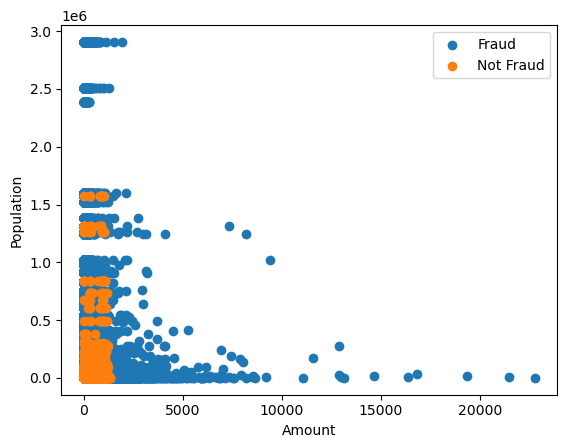

In [42]:
# not sure if this is right
plt.scatter(df[df["is_fraud"] == 0]["amt"], df[df["is_fraud"] == 0]["city_pop"])
plt.scatter(df[df["is_fraud"] == 1]["amt"], df[df["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [45]:
smote_X = pd.DataFrame(smote_X)
smote_y = pd.DataFrame(smote_y)
raw_temp = pd.concat([smote_X, smote_y], axis = 1)
raw_temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,is_fraud
0,-0.141414,-0.289937,1.070757,-0.278376,-0.275988,-0.336219,-0.190510,-0.322955,-0.266147,3.094914,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0
1,-0.389317,-0.276441,0.897274,-0.278376,-0.275988,-0.336219,-0.190510,-0.322955,3.757324,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0
2,0.039317,-0.039814,1.244240,-0.278376,-0.275988,-0.336219,-0.190510,3.096403,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0
3,-0.060003,-0.293272,1.417723,-0.278376,-0.275988,2.974253,-0.190510,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0
4,0.120301,-0.180632,0.608135,3.592267,-0.275988,-0.336219,-0.190510,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775013,2.928237,-0.289327,-0.192000,3.592267,-0.275988,-0.336219,-0.190510,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,1
775014,-0.370246,-0.289225,-0.112553,-0.278376,-0.275988,-0.336219,5.249074,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,-0.314464,-0.17929,1
775015,6.363394,0.002887,0.524250,-0.278376,-0.275988,-0.336219,-0.190510,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,3.510079,-0.314464,-0.17929,1
775016,5.009204,-0.074031,-0.873593,-0.278376,-0.275988,-0.336219,-0.190510,-0.322955,-0.266147,-0.323111,-0.310211,-0.226946,-0.257458,-0.275308,-0.284894,3.180010,-0.17929,1


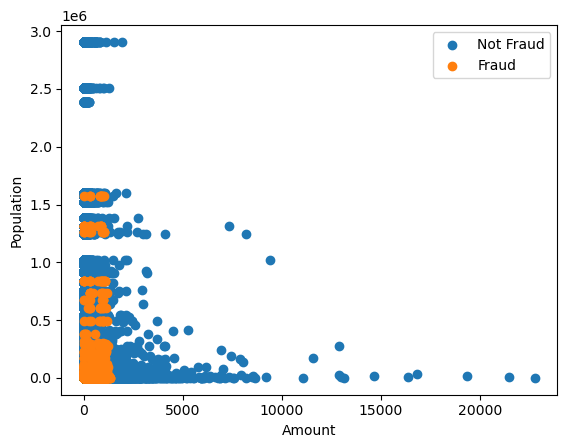

In [47]:
# not sure if this is right
plt.scatter(df[df["is_fraud"] == 0]["amt"], df[df["is_fraud"] == 0]["city_pop"])
plt.scatter(df[df["is_fraud"] == 1]["amt"], df[df["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others i.e. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [64]:
resampling_methods = {
    'over': RandomOverSampler(),
    'under': RandomUnderSampler(),
    'smote': SMOTE()
}

model_configs = {
    'LOG': LogisticRegression(),
    'LASSO': LogisticRegression(penalty = 'l1', C = 2, solver = 'liblinear'),
    'DTREE': DecisionTreeClassifier()
}

In [65]:
# want to calculate a performance metric function
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [66]:
trained_models = {}
results = []

In [67]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f'{resample_key}_{model_key}'
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        
        results.append({'Model': combined_key,
                        'Sensitivity': sensitivity,
                       'Specificity': specificity,
                       'Precision': precision,
                       'Recall': recall,
                       'F1': f1})
        #####
        #results.append(calc_perf_metric(y_test, y_pred))

C:\Users\12282\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\12282\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\12282\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\12282\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [68]:
result_df = pd.DataFrame(results)
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.738411,0.927856,0.035881,0.738411,0.068436
1,over_LASSO,0.738411,0.927928,0.035916,0.738411,0.068499
2,over_DTREE,0.569536,0.998736,0.620939,0.569536,0.594128
3,under_LOG,0.738411,0.924713,0.034435,0.738411,0.065801
4,under_LASSO,0.738411,0.924172,0.034197,0.738411,0.065367
5,under_DTREE,0.953642,0.946048,0.060390,0.953642,0.113587
6,smote_LOG,0.738411,0.925014,0.034568,0.738411,0.066045
7,smote_LASSO,0.738411,0.925014,0.034568,0.738411,0.066045
8,smote_DTREE,0.692053,0.993402,0.276090,0.692053,0.394712


In the machine learning lecture, we were told that F1 is usually the best measure of the validity of a model, particularly when it comes to imbalanced datasets. With this in mind, it is important to note than the over_DTREE model has the best F1 score, and by a large margin. However, smote_DTREE has higher sensitivity and recall values. Because we are predicting whether or not a crdit card transaction is fraudulent or not, it is important to minimize the number of false negatives.

$$ Recall = \frac{TP}{TP + FN} $$

With this in mind, I believe the best model is the one that maximizes recall, therefore minimizing the number of unreported fraudulent purchase (under_DTREE).